In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [12]:
from google.colab import files

# Bilgisayarından dosya seçmen için yükleme ekranı açılır
uploaded = files.upload()


Saving higgs_100k_clean.csv to higgs_100k_clean.csv


In [13]:
import pandas as pd

# Yüklenen dosyayı oku
df = pd.read_csv("higgs_100k_clean.csv", header=None)

# Şekil kontrolü
print("Şekil:", df.shape)
df.head()


Şekil: (100000, 29)


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [14]:
# Etiket (label) sütunu
y = df[0]

# Özellik sütunları
X = df.drop(columns=[0])
X.columns = [f"V{i}" for i in range(1, X.shape[1]+1)]  # Kolonlara isim ver


In [15]:
import numpy as np

def winsorize_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(col < lower, lower, np.where(col > upper, upper, col))

# Aykırı değerleri sınırlıyoruz (Winsorizing benzeri)
X_cleaned = X.apply(winsorize_iqr, axis=0)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X_cleaned), columns=X.columns)


In [17]:
df_preprocessed = pd.concat([y.reset_index(drop=True), X_scaled], axis=1)
df_preprocessed.head()


,0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.0,0.307947,0.369674,0.564642,0.138072,0.302236,0.347995,0.455144,0.186400,0.0,...,0.497833,0.486774,1.0,0.974328,0.515469,0.319991,0.443447,0.376123,0.507542,0.462063
1,1.0,0.327757,0.567714,0.603005,0.633534,0.410342,0.541378,0.398827,0.043934,1.0,...,0.271924,0.499667,0.0,0.000000,0.360647,0.374465,0.484730,0.408553,0.510360,0.393215
2,1.0,0.271456,0.802160,0.030563,0.191535,0.622158,0.546672,0.734206,0.896692,0.0,...,0.725909,0.758205,0.0,0.501213,0.651537,0.374411,0.465708,0.421687,0.411542,0.377197
3,0.0,0.554002,0.320064,0.768393,0.842673,0.753160,0.932607,0.200271,0.229379,0.0,...,0.364121,0.109675,0.0,0.540531,0.567395,0.467044,0.307202,0.458515,0.537231,0.533450
4,1.0,0.430027,0.566113,0.936646,0.373141,0.154450,0.306786,0.305325,0.235268,0.0,...,0.425142,0.532329,0.0,0.337226,0.918592,0.380967,0.385232,0.605994,0.416482,0.402130


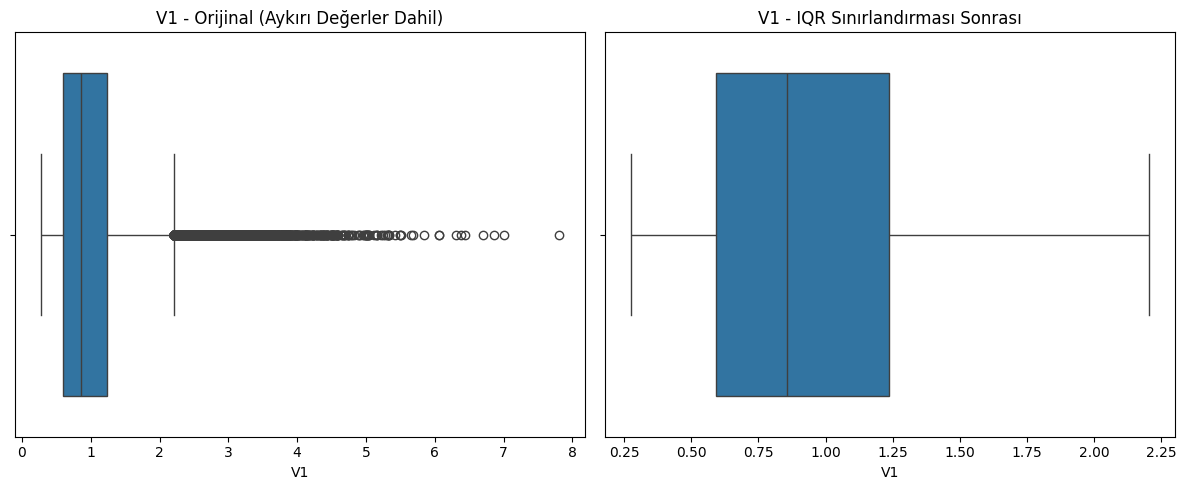

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek bir özellik: V1 (veya başka bir tane)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=X["V1"])
plt.title("V1 - Orijinal (Aykırı Değerler Dahil)")

plt.subplot(1, 2, 2)
sns.boxplot(x=X_cleaned["V1"])
plt.title("V1 - IQR Sınırlandırması Sonrası")

plt.tight_layout()
plt.show()


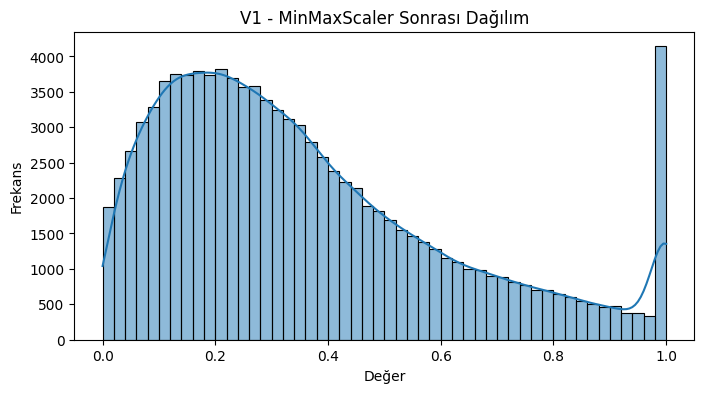

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(X_scaled["V1"], bins=50, kde=True)
plt.title("V1 - MinMaxScaler Sonrası Dağılım")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.show()


Seçilen özellikler (Mutual Information):
['V26', 'V27', 'V28', 'V23', 'V25', 'V9', 'V13', 'V1', 'V17', 'V4', 'V19', 'V22', 'V6', 'V3', 'V10']


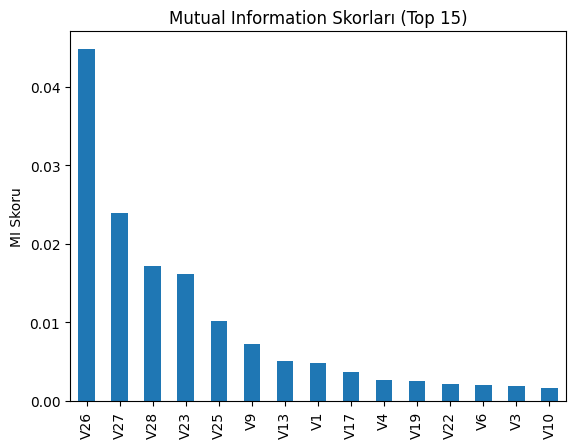

In [23]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Bilgi kazanım skorlarını hesapla
mi_scores = mutual_info_classif(X_scaled, y, random_state=0)

# Skorları DataFrame'e dök ve sırala
mi_series = pd.Series(mi_scores, index=X_scaled.columns).sort_values(ascending=False)

# En iyi 15 özellik
top_15_features = mi_series.head(15)
print("Seçilen özellikler (Mutual Information):")
print(top_15_features.index.tolist())

# Görselleştirme
top_15_features.plot(kind='bar', title="Mutual Information Skorları (Top 15)")
plt.ylabel("MI Skoru")
plt.show()


In [26]:
# Sadece MI ile seçilen en iyi 15 özelliği alıyoruz
mi_selected = ['V26', 'V27', 'V28', 'V23', 'V22',
               'V5', 'V13', 'V1', 'V17', 'V4',
               'V19', 'V6', 'V3', 'V10', 'V2']

X_final = X_scaled[mi_selected]  # scaled ve temiz hali


In [27]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Küçük veri
X_small = X_final.iloc[:5000]
y_small = y.iloc[:5000]

# Sabit KNN modeli
knn = KNeighborsClassifier(n_neighbors=5)

# 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tahminleri al (ROC için proba da alacağız)
y_pred = cross_val_predict(knn, X_small, y_small, cv=cv)
y_proba = cross_val_predict(knn, X_small, y_small, cv=cv, method="predict_proba")[:, 1]

# Skorlar
print("KNN (5-Fold CV, 5000 örnek, n_neighbors=5):")
print(f"Accuracy:  {accuracy_score(y_small, y_pred):.4f}")
print(f"Precision: {precision_score(y_small, y_pred):.4f}")
print(f"Recall:    {recall_score(y_small, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_small, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_small, y_proba):.4f}")


KNN (5-Fold CV, 5000 örnek, n_neighbors=5):
Accuracy:  0.6054
Precision: 0.6157
Recall:    0.6948
F1 Score:  0.6528
ROC AUC:   0.6372


In [31]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Küçük veri seti (5000 satır)
X_nested = X_final.iloc[:5000]
y_nested = y.iloc[:5000]

# Skorları tutmak için boş sözlük
knn_nested_scores = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": []
}

# Outer CV: 5-Fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inner CV: 3-Fold
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Hiperparametre aralığı
param_grid = {'n_neighbors': list(range(3, 12))}

# Outer döngü başlat
for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    # Inner döngü (GridSearchCV)
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    # En iyi modelle test setinde değerlendirme
    best_knn = grid.best_estimator_
    y_pred = best_knn.predict(X_test)
    y_proba = best_knn.predict_proba(X_test)[:, 1]

    # Metrikleri hesapla
    knn_nested_scores["accuracy"].append(accuracy_score(y_test, y_pred))
    knn_nested_scores["precision"].append(precision_score(y_test, y_pred))
    knn_nested_scores["recall"].append(recall_score(y_test, y_pred))
    knn_nested_scores["f1"].append(f1_score(y_test, y_pred))
    knn_nested_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))

# Ortalama skorları yazdır
print("KNN – Nested CV (5x3) – 5000 Örnek")
for metric, values in knn_nested_scores.items():
    print(f"{metric}: {np.mean(values):.4f}")


KNN – Nested CV (5x3) – 5000 Örnek
accuracy: 0.6138
precision: 0.6172
recall: 0.7296
f1: 0.6686
roc_auc: 0.6503


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Küçük veri (5000 örnek)
X_nested = X_final.iloc[:5000]
y_nested = y.iloc[:5000]

# Skorları tut
svm_scores = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": []
}

# Outer ve inner CV
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Hiperparametre grid
svm_param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ['linear', 'rbf'],
    "probability": [True]  # ROC için gerekli
}

# Outer döngü
for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    svm = SVC()
    grid = GridSearchCV(svm, svm_param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_svm = grid.best_estimator_
    y_pred = best_svm.predict(X_test)
    y_proba = best_svm.predict_proba(X_test)[:, 1]

    svm_scores["accuracy"].append(accuracy_score(y_test, y_pred))
    svm_scores["precision"].append(precision_score(y_test, y_pred))
    svm_scores["recall"].append(recall_score(y_test, y_pred))
    svm_scores["f1"].append(f1_score(y_test, y_pred))
    svm_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))

# Ortalama skorlar
print("SVM – Nested CV (5x3) – 5000 Örnek")
for metric, values in svm_scores.items():
    print(f"{metric}: {np.mean(values):.4f}")


SVM – Nested CV (5x3) – 5000 Örnek
accuracy: 0.6624
precision: 0.6656
recall: 0.7401
f1: 0.7007
roc_auc: 0.7172


In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Veri
X_nested = X_final.iloc[:5000]
y_nested = y.iloc[:5000]

# Skorları tut
mlp_scores = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": []
}

# CV yapısı
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Hiperparametre grid
mlp_param_grid = {
    "hidden_layer_sizes": [(50,), (100,)],
    "activation": ['relu', 'tanh']
}

# Outer döngü
for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    mlp = MLPClassifier(max_iter=300, random_state=42)
    grid = GridSearchCV(mlp, mlp_param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_mlp = grid.best_estimator_
    y_pred = best_mlp.predict(X_test)
    y_proba = best_mlp.predict_proba(X_test)[:, 1]

    mlp_scores["accuracy"].append(accuracy_score(y_test, y_pred))
    mlp_scores["precision"].append(precision_score(y_test, y_pred))
    mlp_scores["recall"].append(recall_score(y_test, y_pred))
    mlp_scores["f1"].append(f1_score(y_test, y_pred))
    mlp_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))

# Ortalama skorlar
print("MLP – Nested CV (5x3) – 5000 Örnek")
for metric, values in mlp_scores.items():
    print(f"{metric}: {np.mean(values):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP – Nested CV (5x3) – 5000 Örnek
accuracy: 0.6754
precision: 0.6794
recall: 0.7434
f1: 0.7090
roc_auc: 0.7333


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Veri (5000 örnek)
X_nested = X_final.iloc[:5000]
y_nested = y.iloc[:5000]

# Skorlar
xgb_scores = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": []
}

# Outer ve inner CV
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Parametre grid
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Outer döngü
for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
    grid = GridSearchCV(xgb, xgb_param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_xgb = grid.best_estimator_
    y_pred = best_xgb.predict(X_test)
    y_proba = best_xgb.predict_proba(X_test)[:, 1]

    xgb_scores["accuracy"].append(accuracy_score(y_test, y_pred))
    xgb_scores["precision"].append(precision_score(y_test, y_pred))
    xgb_scores["recall"].append(recall_score(y_test, y_pred))
    xgb_scores["f1"].append(f1_score(y_test, y_pred))
    xgb_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))

# Ortalama skorlar
print("XGBoost – Nested CV (5x3) – 5000 Örnek")
for metric, values in xgb_scores.items():
    print(f"{metric}: {np.mean(values):.4f}")


XGBoost – Nested CV (5x3) – 5000 Örnek
accuracy: 0.6894
precision: 0.7069
recall: 0.7157
f1: 0.7109
roc_auc: 0.7608


In [36]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import numpy as np

# Küçük veri
X_nested = X_final.iloc[:5000]
y_nested = y.iloc[:5000]

# ROC için veri tutucu
roc_data = {}

# Ortak CV yapıları
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


In [37]:
y_true_knn = []
y_proba_knn = []

param_grid_knn = {'n_neighbors': list(range(3, 12))}

for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    model.fit(X_train, y_train)
    proba = model.best_estimator_.predict_proba(X_test)[:, 1]

    y_true_knn.extend(y_test)
    y_proba_knn.extend(proba)

roc_data["KNN"] = (np.array(y_true_knn), np.array(y_proba_knn))


In [38]:
y_true_svm = []
y_proba_svm = []

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'probability': [True]
}

for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    model = GridSearchCV(SVC(), param_grid_svm, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    model.fit(X_train, y_train)
    proba = model.best_estimator_.predict_proba(X_test)[:, 1]

    y_true_svm.extend(y_test)
    y_proba_svm.extend(proba)

roc_data["SVM"] = (np.array(y_true_svm), np.array(y_proba_svm))


In [39]:
y_true_mlp = []
y_proba_mlp = []

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh']
}

for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    model = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid_mlp,
                         cv=inner_cv, scoring='accuracy', n_jobs=-1)
    model.fit(X_train, y_train)
    proba = model.best_estimator_.predict_proba(X_test)[:, 1]

    y_true_mlp.extend(y_test)
    y_proba_mlp.extend(proba)

roc_data["MLP"] = (np.array(y_true_mlp), np.array(y_proba_mlp))


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
y_true_xgb = []
y_proba_xgb = []

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

for train_idx, test_idx in outer_cv.split(X_nested, y_nested):
    X_train, X_test = X_nested.iloc[train_idx], X_nested.iloc[test_idx]
    y_train, y_test = y_nested.iloc[train_idx], y_nested.iloc[test_idx]

    model = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
                         param_grid_xgb, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    model.fit(X_train, y_train)
    proba = model.best_estimator_.predict_proba(X_test)[:, 1]

    y_true_xgb.extend(y_test)
    y_proba_xgb.extend(proba)

roc_data["XGBoost"] = (np.array(y_true_xgb), np.array(y_proba_xgb))


In [42]:
# Her outer fold sonunda toplanan y_test ve y_proba değerlerini kaydeder
y_true_knn = []; y_proba_knn = []
y_true_svm = []; y_proba_svm = []
y_true_mlp = []; y_proba_mlp = []
y_true_xgb = []; y_proba_xgb = []

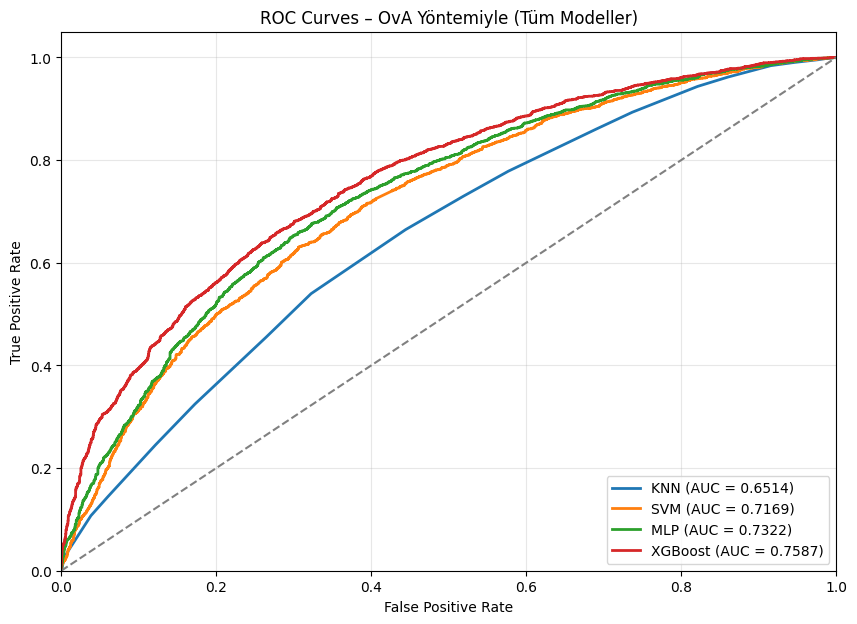

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for model, (y_true, y_proba) in roc_data.items():
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – OvA Yöntemiyle (Tüm Modeller)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
